In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable



In [2]:
# Load the data
df = pd.read_csv("integrated_data_egy_2021.csv")
print(df.shape)
df

(137255, 14)


,longitude,latitude,light_intensity,geometry,index_right,quadkey,avg_d_kbps,avg_u_kbps,avg_lat_ms,tests,devices,country,quarter,timestamp
0,34.554168,31.670833,0,POINT (34.554168383100006 31.6708329867),3100384.0,1.221300e+15,186024.0,50959.0,7.0,30.0,14.0,E.G.Y,Q1,2021-01-01
1,34.558335,31.670833,0,POINT (34.55833504980001 31.6708329867),3100385.0,1.221300e+15,187855.0,33403.0,10.0,74.0,19.0,E.G.Y,Q1,2021-01-01
2,34.562502,31.670833,0,POINT (34.56250171650001 31.6708329867),3100385.0,1.221300e+15,187855.0,33403.0,10.0,74.0,19.0,E.G.Y,Q1,2021-01-01
3,34.566668,31.670833,0,POINT (34.56666838320001 31.6708329867),3100391.0,1.221300e+15,100145.0,22133.0,12.0,99.0,22.0,E.G.Y,Q1,2021-01-01
4,34.570835,31.670833,0,POINT (34.57083504990001 31.6708329867),3100392.0,1.221300e+15,254579.0,60568.0,6.0,65.0,19.0,E.G.Y,Q1,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137250,31.612502,22.354166,196,POINT (31.612501692900008 22.3541662455),3204587.0,1.221233e+15,2795.0,814.0,39.0,1.0,1.0,E.G.Y,Q4,2021-10-01
137251,31.616668,22.350000,196,POINT (31.61666835960001 22.3499995788),3204588.0,1.221233e+15,19370.0,776.0,42.0,2.0,1.0,E.G.Y,Q4,2021-10-01
137252,31.616668,22.345833,196,POINT (31.61666835960001 22.3458329121),3204588.0,1.221233e+15,19370.0,776.0,42.0,2.0,1.0,E.G.Y,Q4,2021-10-01
137253,31.616668,22.341666,196,POINT (31.61666835960001 22.3416662454),3204589.0,1.221233e+15,23701.0,16044.0,49.0,2.0,2.0,E.G.Y,Q4,2021-10-01


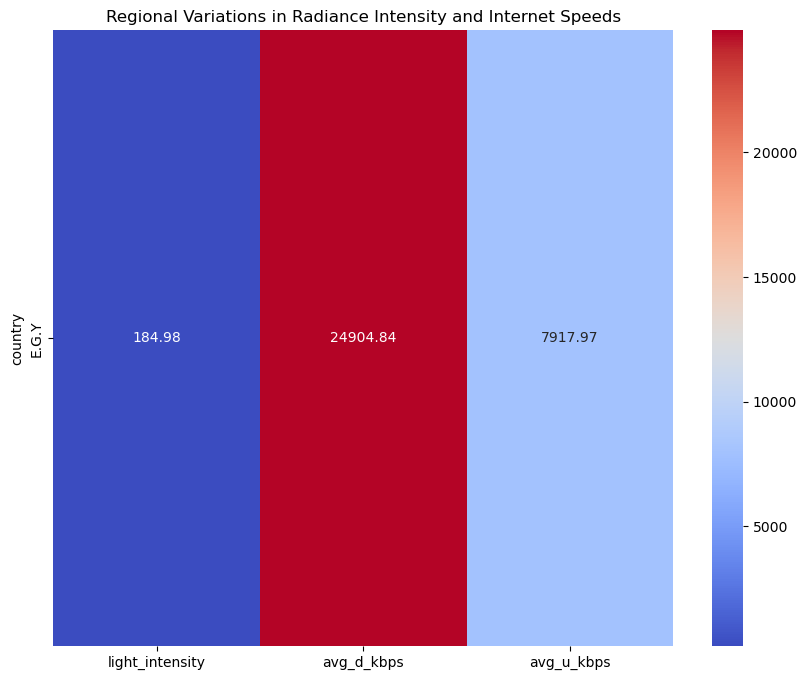

In [3]:
heatmap_data = df.groupby('country')[['light_intensity', 'avg_d_kbps', 'avg_u_kbps']].mean()
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Regional Variations in Radiance Intensity and Internet Speeds")
plt.show()

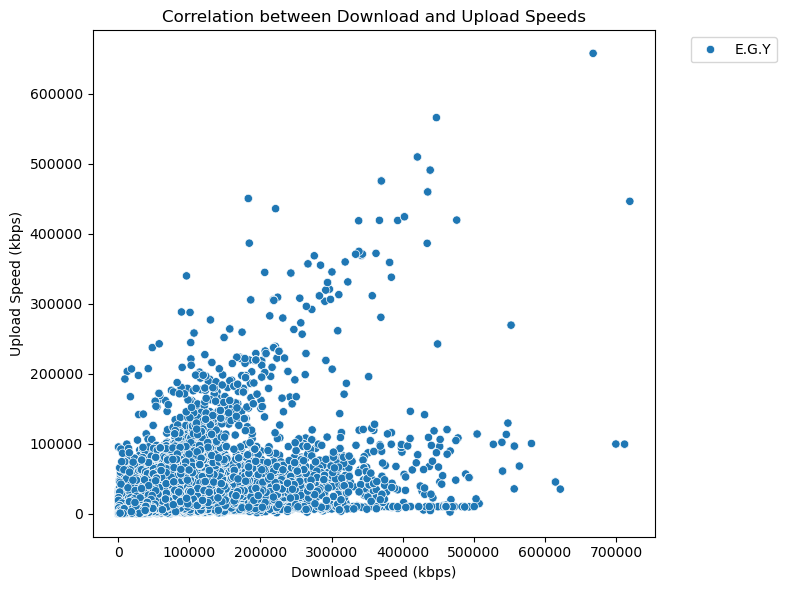

In [4]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_d_kbps', y='avg_u_kbps', hue='country', data=df)
plt.title("Correlation between Download and Upload Speeds")
plt.xlabel("Download Speed (kbps)")
plt.ylabel("Upload Speed (kbps)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

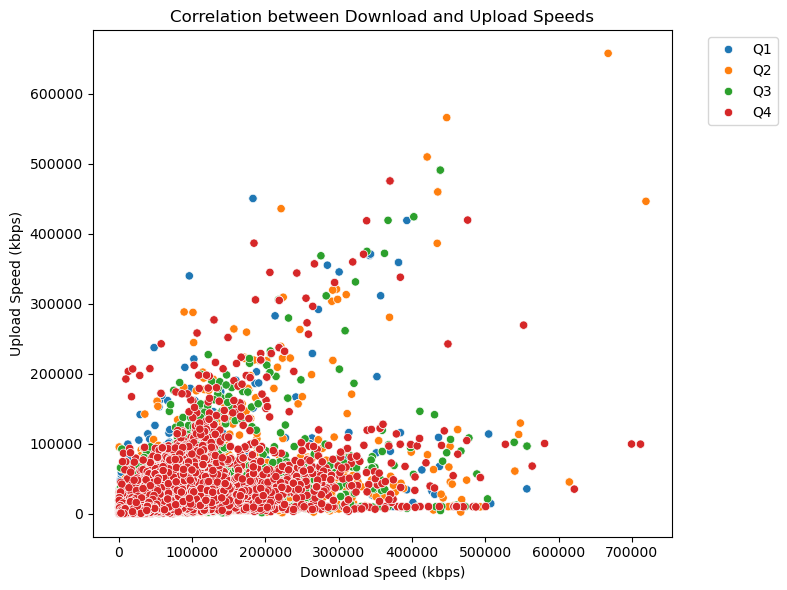

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_d_kbps', y='avg_u_kbps', hue='quarter', data=df)
plt.title("Correlation between Download and Upload Speeds")
plt.xlabel("Download Speed (kbps)")
plt.ylabel("Upload Speed (kbps)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

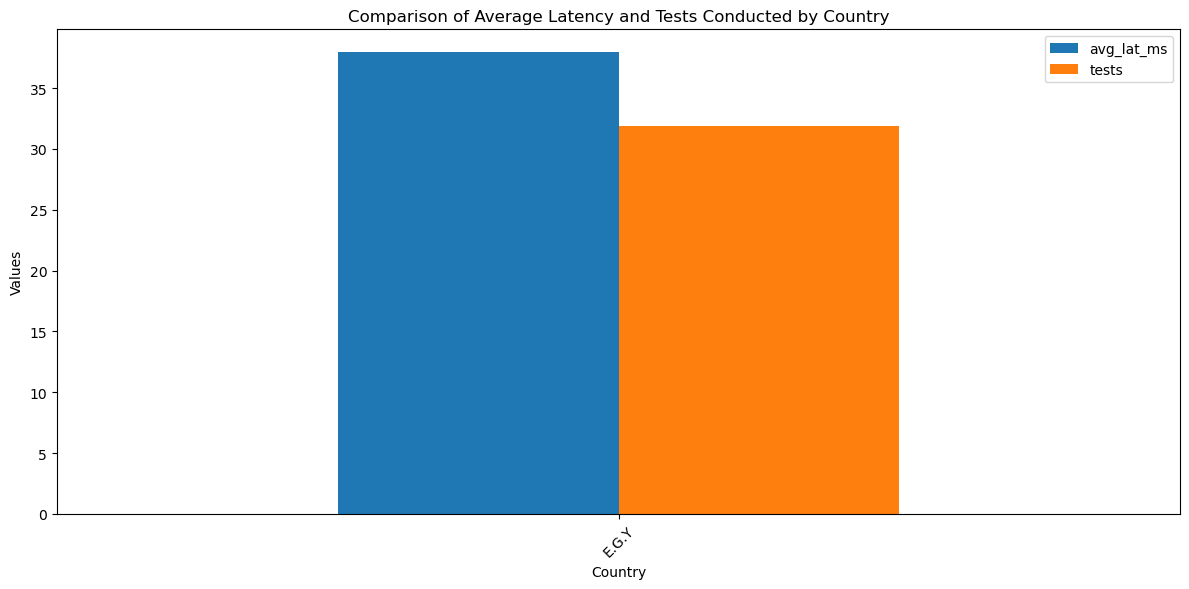

In [6]:
bar_data = df.groupby('country')[['avg_lat_ms', 'tests']].mean().sort_values(by='avg_lat_ms')
bar_data.plot(kind='bar', figsize=(12, 6))
plt.title("Comparison of Average Latency and Tests Conducted by Country")
plt.xlabel("Country")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Smart city regions file not found. Creating a simple example region...


C:\Users\pepob\AppData\Local\Temp\ipykernel_1000\4243014153.py:50: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(title='Categories', loc='upper left')


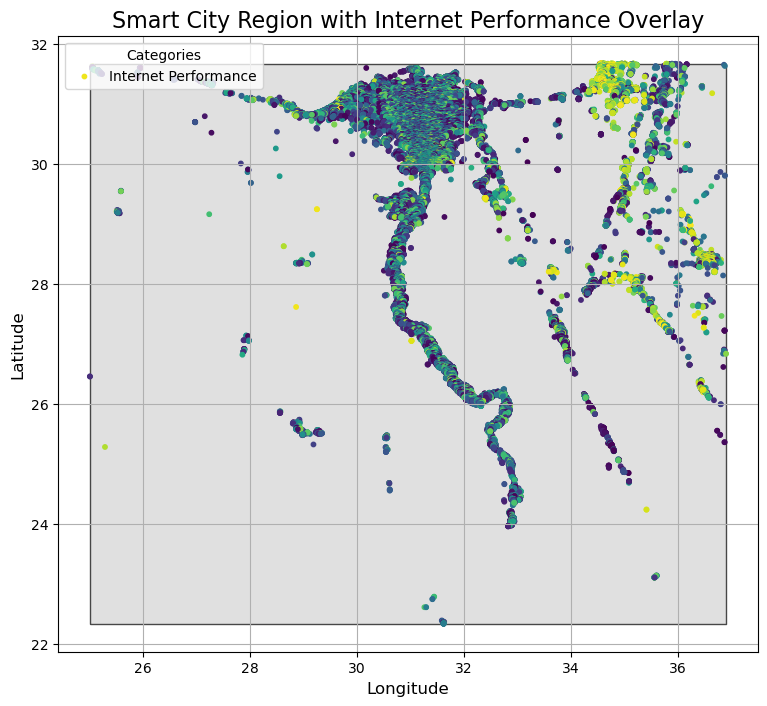

In [7]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon


data = df

# Convert the dataset to a GeoDataFrame
data['geometry'] = data.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf_data = gpd.GeoDataFrame(data, geometry='geometry', crs="EPSG:4326")  # Set CRS to WGS84

# Create a fallback rectangular region based on dataset bounds
print("Smart city regions file not found. Creating a simple example region...")
example_region = Polygon([
    (data['longitude'].min(), data['latitude'].min()),
    (data['longitude'].max(), data['latitude'].min()),
    (data['longitude'].max(), data['latitude'].max()),
    (data['longitude'].min(), data['latitude'].max()),
    (data['longitude'].min(), data['latitude'].min()),
])
regions_gdf = gpd.GeoDataFrame({'geometry': [example_region]}, crs="EPSG:4326")

# Ensure both GeoDataFrames are in the same CRS
if gdf_data.crs != regions_gdf.crs:
    gdf_data = gdf_data.to_crs(regions_gdf.crs)

# Plot the overlay
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the smart city regions
regions_gdf.plot(ax=ax, color='lightgray', edgecolor='black', alpha=0.7, label='Smart City Region')

# Plot the internet performance data
# Example: Use avg_d_kbps_category for color-coding
gdf_data.plot(
    ax=ax,
    column='avg_d_kbps',
    categorical=True,
    legend=True,
    markersize=10,
    cmap='viridis',
    label='Internet Performance'
)

# Add titles and labels
plt.title('Smart City Region with Internet Performance Overlay', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Categories', loc='upper left')
plt.grid(True)

# Save or show the map
plt.savefig('smart_city_overlay.png', dpi=300, bbox_inches='tight')
plt.show()


In [8]:
df['timestamp'] = df['quarter'].apply(
    lambda x: '2021-01-01' if x == 'Q1' else 
              '2021-04-01' if x == 'Q2' else 
              '2021-07-01' if x == 'Q3' else 
              '2021-10-01'
)


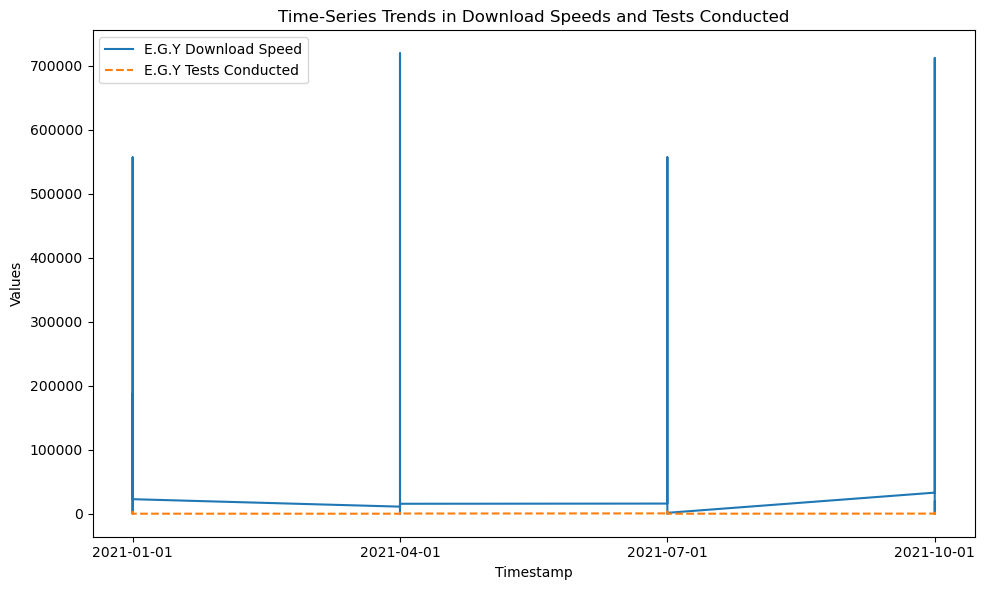

In [9]:
plt.figure(figsize=(10, 6))
key_countries = df['country'].unique()[:5]
for country in key_countries:
    country_data = df[df['country'] == country].sort_values(by='timestamp')
    plt.plot(country_data['timestamp'], country_data['avg_d_kbps'], label=f"{country} Download Speed")
    plt.plot(country_data['timestamp'], country_data['tests'], label=f"{country} Tests Conducted", linestyle='--')
plt.title("Time-Series Trends in Download Speeds and Tests Conducted")
plt.xlabel("Timestamp")
plt.ylabel("Values")
plt.legend()
plt.tight_layout()
plt.show()


Descriptive Statistics by Country:
        light_intensity                                                    \
                  count        mean       std    min    25%    50%    75%   
country                                                                     
E.G.Y          118173.0  214.849517  6.874123  192.0  210.0  212.0  221.0   

               avg_d_kbps                ...                    avg_u_kbps  \
           max      count          mean  ...      75%       max      count   
country                                  ...                                 
E.G.Y    226.0   118173.0  18109.157464  ...  23477.0  556921.0   118173.0   

                                                                       
             mean           std  min    25%     50%     75%       max  
country                                                                
E.G.Y    5713.913  12027.805276  1.0  995.0  2609.0  4922.0  368494.0  

[1 rows x 24 columns]


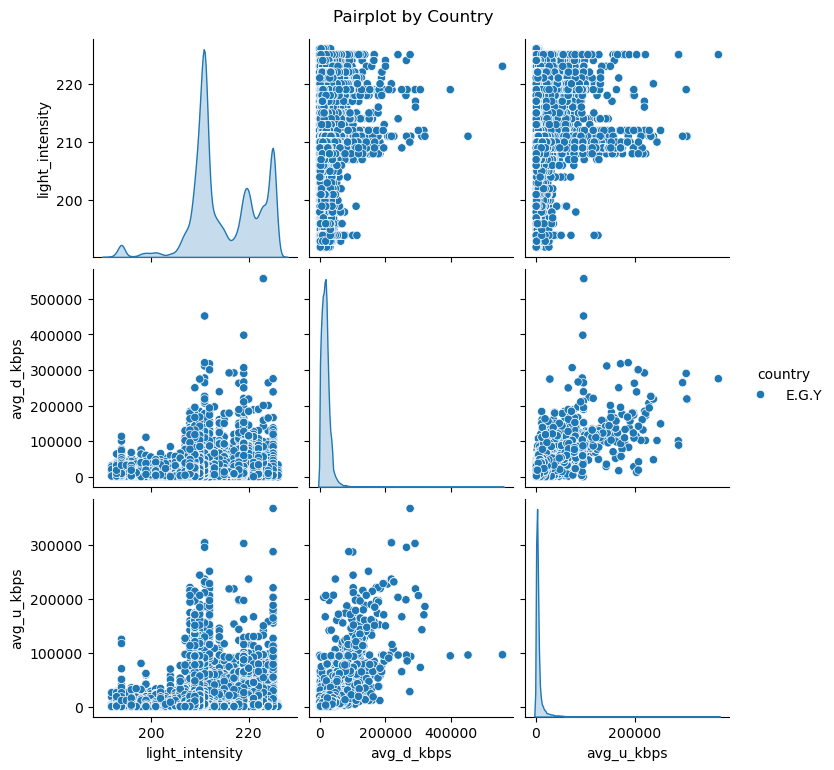

In [10]:
#Null Hypothesis
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data with valid values for hypothesis testing
filtered_data = data[(data['avg_d_kbps'] > 0) & (data['avg_u_kbps'] > 0) & (data['light_intensity'] > 0)]

# Descriptive statistics for relevant variables
print("\nDescriptive Statistics by Country:")
print(filtered_data.groupby('country')[['light_intensity', 'avg_d_kbps', 'avg_u_kbps']].describe())

# Visualizations for the Null Hypothesis
sns.pairplot(filtered_data, hue='country', vars=['light_intensity', 'avg_d_kbps', 'avg_u_kbps'])
plt.suptitle("Pairplot by Country", y=1.02)
plt.show()

# Hypothesis testing using Spearman correlation
correlation_download, p_value_download = spearmanr(filtered_data['light_intensity'], filtered_data['avg_d_kbps'])
correlation_upload, p_value_upload = spearmanr(filtered_data['light_intensity'], filtered_data['avg_u_kbps'])


First few rows of the filtered data:
     longitude   latitude  light_intensity  \
314  31.087502  31.600000              225   
315  31.100002  31.600000              225   
333  31.050002  31.591666              225   
334  31.087502  31.591666              225   
348  30.979168  31.587500              225   

                                     geometry  index_right       quadkey  \
314   POINT (31.08750168870001 31.5999996528)    3086346.0  1.221211e+15   
315   POINT (31.10000168880001 31.5999996528)    3086347.0  1.221211e+15   
333   POINT (31.05000168840001 31.5916663194)    3086345.0  1.221211e+15   
334   POINT (31.08750168870001 31.5916663194)    3086348.0  1.221211e+15   
348  POINT (30.979168354500008 31.5874996527)    3086332.0  1.221211e+15   

     avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices country quarter  \
314     12909.0      2493.0        14.0    3.0      2.0   E.G.Y      Q1   
315     38823.0     17015.0        16.0    3.0      2.0   E.G.Y      Q1   
333 

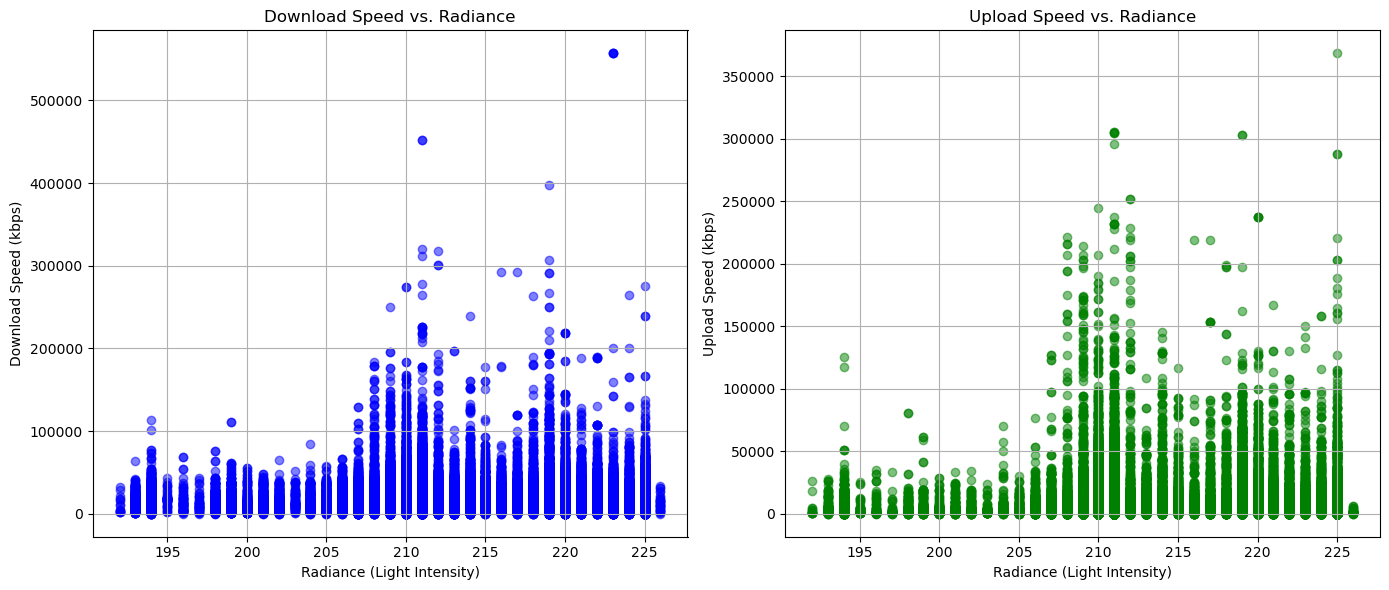

In [11]:
# Data validation
required_columns = ['avg_d_kbps', 'avg_u_kbps', 'light_intensity']
for col in required_columns:
    if col not in data.columns:
        raise ValueError(f"Column '{col}' is missing from the dataset.")

# Filter data for positive values
filtered_data = data[(data['avg_d_kbps'] > 0) & (data['avg_u_kbps'] > 0) & (data['light_intensity'] > 0)]

# Print the first few rows of the filtered data
print("First few rows of the filtered data:")
print(filtered_data.head())

# Create scatter plots
plt.figure(figsize=(14, 6))

# Scatter plot for Download Speed vs. Radiance
plt.subplot(1, 2, 1)
plt.scatter(filtered_data['light_intensity'], filtered_data['avg_d_kbps'], color='blue', alpha=0.5)
plt.title('Download Speed vs. Radiance')
plt.xlabel('Radiance (Light Intensity)')
plt.ylabel('Download Speed (kbps)')
plt.grid(True)

# Scatter plot for Upload Speed vs. Radiance
plt.subplot(1, 2, 2)
plt.scatter(filtered_data['light_intensity'], filtered_data['avg_u_kbps'], color='green', alpha=0.5)
plt.title('Upload Speed vs. Radiance')
plt.xlabel('Radiance (Light Intensity)')
plt.ylabel('Upload Speed (kbps)')
plt.grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


   longitude   latitude  light_intensity  \
0  34.554168  31.670833                0   
1  34.558335  31.670833                0   
2  34.562502  31.670833                0   
3  34.566668  31.670833                0   
4  34.570835  31.670833                0   

                                   geometry  index_right       quadkey  \
0  POINT (34.554168383100006 31.6708329867)    3100384.0  1.221300e+15   
1   POINT (34.55833504980001 31.6708329867)    3100385.0  1.221300e+15   
2   POINT (34.56250171650001 31.6708329867)    3100385.0  1.221300e+15   
3   POINT (34.56666838320001 31.6708329867)    3100391.0  1.221300e+15   
4   POINT (34.57083504990001 31.6708329867)    3100392.0  1.221300e+15   

   avg_d_kbps  avg_u_kbps  avg_lat_ms  tests  devices quarter   timestamp  \
0    186024.0     50959.0         7.0   30.0     14.0      Q1  2021-01-01   
1    187855.0     33403.0        10.0   74.0     19.0      Q1  2021-01-01   
2    187855.0     33403.0        10.0   74.0     19.0      

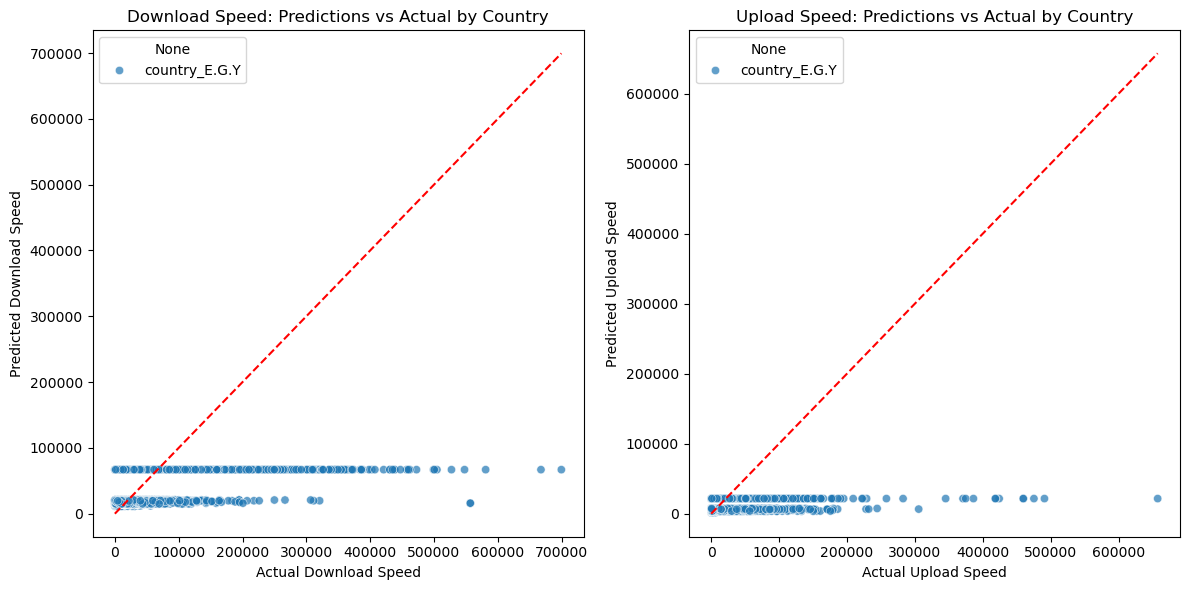

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with the data

# One-hot encode the 'country' column (this will create separate columns for each country)
df_encoded = pd.get_dummies(df, columns=['country'], drop_first=False)

# Debug: Check the first few rows of the encoded DataFrame
print(df_encoded.head())

# Filter data to remove rows with missing values in critical columns
filtered_data = df_encoded.dropna(subset=['light_intensity', 'avg_d_kbps', 'avg_u_kbps'])

# Define feature set (X) and target variables (y)
X = filtered_data[['light_intensity'] + [col for col in df_encoded.columns if 'country' in col]]  
y_download = filtered_data['avg_d_kbps']  
y_upload = filtered_data['avg_u_kbps']  

# Split data into training and testing sets
X_train, X_test, y_train_d, y_test_d = train_test_split(X, y_download, test_size=0.2, random_state=42)
_, _, y_train_u, y_test_u = train_test_split(X, y_upload, test_size=0.2, random_state=42)

# Train Random Forest Regressor for download speed
rf_download = RandomForestRegressor(random_state=42, n_estimators=100)
rf_download.fit(X_train, y_train_d)

# Train Random Forest Regressor for upload speed
rf_upload = RandomForestRegressor(random_state=42, n_estimators=100)
rf_upload.fit(X_train, y_train_u)

# Make predictions
y_pred_d = rf_download.predict(X_test)
y_pred_u = rf_upload.predict(X_test)

# Evaluate the model for download speed
print("\nDownload Speed Prediction Performance:")
print(f"MAE: {mean_absolute_error(y_test_d, y_pred_d):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_d, y_pred_d)):.2f}")
print(f"R²: {r2_score(y_test_d, y_pred_d):.2f}")

# Evaluate the model for upload speed
print("\nUpload Speed Prediction Performance:")
print(f"MAE: {mean_absolute_error(y_test_u, y_pred_u):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_u, y_pred_u)):.2f}")
print(f"R²: {r2_score(y_test_u, y_pred_u):.2f}")

# Get the one-hot encoded country columns
country_columns = [col for col in df_encoded.columns if 'country' in col]

# Debug: Ensure that both countries are represented
print("\nOne-Hot Encoded Country Columns:")
print(country_columns)

# Get the country corresponding to the maximum one-hot encoded value (idxmax returns the column name with the highest value)
country_pred = filtered_data[country_columns].idxmax(axis=1)

# Since filtered_data might have more rows than X_test, make sure to get the relevant part corresponding to X_test
country_pred_test = country_pred.iloc[X_test.index]

# Visualize predictions vs actual values by country
plt.figure(figsize=(12, 6))

# Download speed predictions by country with different markers
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test_d, y=y_pred_d, hue=country_pred_test, style=country_pred_test, alpha=0.7)
plt.plot([y_test_d.min(), y_test_d.max()], [y_test_d.min(), y_test_d.max()], 'r--')
plt.xlabel("Actual Download Speed")
plt.ylabel("Predicted Download Speed")
plt.title("Download Speed: Predictions vs Actual by Country")

# Upload speed predictions by country with different markers
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_u, y=y_pred_u, hue=country_pred_test, style=country_pred_test, alpha=0.7)
plt.plot([y_test_u.min(), y_test_u.max()], [y_test_u.min(), y_test_u.max()], 'r--')
plt.xlabel("Actual Upload Speed")
plt.ylabel("Predicted Upload Speed")
plt.title("Upload Speed: Predictions vs Actual by Country")

plt.tight_layout()
plt.show()
